In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from freq_pd import proc_freq

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
cdtypes = {'Item_Number':str,'Category':str}

In [6]:
# products_iowa = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\Iowa_Liquor_Products(1).csv',dtype=pdtypes)

In [7]:
df_categories_items =pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\categories_items.csv',dtype=cdtypes, index_col=0)

In [8]:
df_categories_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4472 entries, 0 to 4471
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item_Number        4472 non-null   object
 1   Item_Description   4472 non-null   object
 2   Category           4472 non-null   object
 3   Category_Name      4472 non-null   object
 4   New_Category_Name  4472 non-null   object
dtypes: object(5)
memory usage: 209.6+ KB


In [9]:
df_categories_items = df_categories_items.drop(columns=['Item_Description'])

In [10]:
dict_dtype = {'Item_Number':str,
'Bottle_Volume (ml)':int,
'Bottles_Sold':int,
'Bottle_Retail':float,
'Store_Number':int}

In [11]:
products = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\clustering_data_num_unique_stores.csv',dtype=dict_dtype, index_col=0)

In [12]:
products.rename({'Store_Number':'Num_Stores_Selling', 'Sales':'revenue'} ,axis=1, inplace=True)
              

In [13]:
products = products.drop(columns=['New_Category_Name'])

In [14]:
products = products.merge(df_categories_items,how='left',right_on='Item_Number', left_on='Item_Number')

In [15]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4475 entries, 0 to 4474
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         4475 non-null   object 
 1   Item_Description    4475 non-null   object 
 2   Bottle_Volume       4475 non-null   int64  
 3   Bottle_Retail       4475 non-null   float64
 4   Bottles_Sold        4475 non-null   int32  
 5   Num_Stores_Selling  4475 non-null   int32  
 6   revenue             4475 non-null   float64
 7   Category            4475 non-null   object 
 8   Category_Name       4475 non-null   object 
 9   New_Category_Name   4475 non-null   object 
dtypes: float64(2), int32(2), int64(1), object(5)
memory usage: 349.6+ KB


In [16]:
check = products['revenue'].sum()
print(check)

424233229.6


In [17]:
products2 = products.copy()

In [18]:
#remove minis seliing for over $10 due to data quality issues see data quality check notebook
poor_quality = products2.loc[(products.Bottle_Volume == 50) & (products.Bottle_Retail > 10)]
poor_quality.shape

(159, 10)

In [97]:
poor_quality.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\poor_data_quality_items.csv')

In [19]:

(products.Bottle_Volume == 50) & (products.Bottle_Retail > 10)

0       False
1       False
2       False
3       False
4       False
        ...  
4470    False
4471    False
4472    False
4473    False
4474    False
Length: 4475, dtype: bool

In [20]:
poor_quality_mask = (products.Bottle_Volume == 50) & (products.Bottle_Retail > 10)
type(poor_quality_mask)

pandas.core.series.Series

In [21]:
products2 = products2[~poor_quality_mask]

In [22]:
products2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4316 entries, 0 to 4474
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         4316 non-null   object 
 1   Item_Description    4316 non-null   object 
 2   Bottle_Volume       4316 non-null   int64  
 3   Bottle_Retail       4316 non-null   float64
 4   Bottles_Sold        4316 non-null   int32  
 5   Num_Stores_Selling  4316 non-null   int32  
 6   revenue             4316 non-null   float64
 7   Category            4316 non-null   object 
 8   Category_Name       4316 non-null   object 
 9   New_Category_Name   4316 non-null   object 
dtypes: float64(2), int32(2), int64(1), object(5)
memory usage: 337.2+ KB


In [23]:
products.describe()

,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue
count,4475.000000,4475.000000,4.475000e+03,4475.000000,4.475000e+03
mean,792.361564,31.221806,6.930340e+03,125.248045,9.480072e+04
std,410.724957,69.350753,3.972229e+04,214.229508,3.889196e+05
min,20.000000,0.990000,1.000000e+00,1.000000,7.500000e+00
25%,750.000000,11.799501,5.250000e+01,3.000000,1.395540e+03
50%,750.000000,20.250000,5.470000e+02,49.000000,1.304100e+04
75%,750.000000,35.000000,3.622000e+03,154.000000,5.269973e+04
max,5250.000000,2963.694000,2.105088e+06,1725.000000,1.062280e+07


In [24]:
products.shape

(4475, 10)

<AxesSubplot:xlabel='Bottle_Retail', ylabel='Count'>

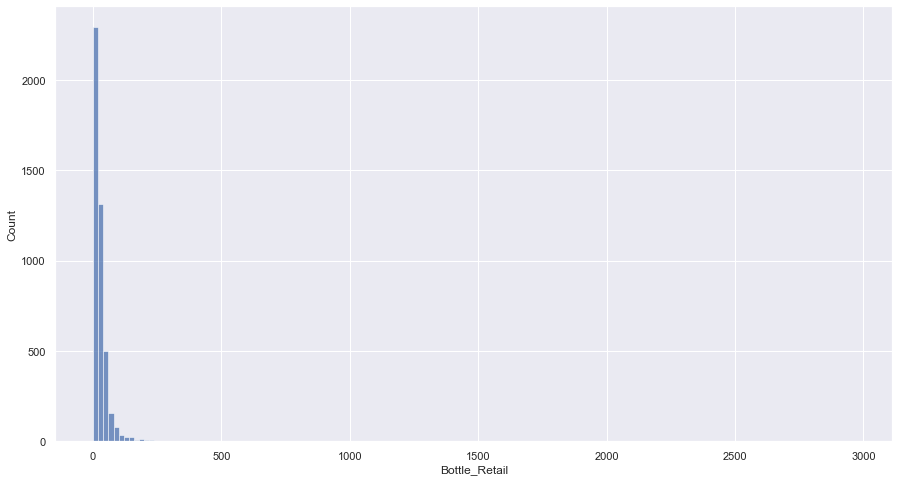

In [25]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(products['Bottle_Retail'], bins=150)


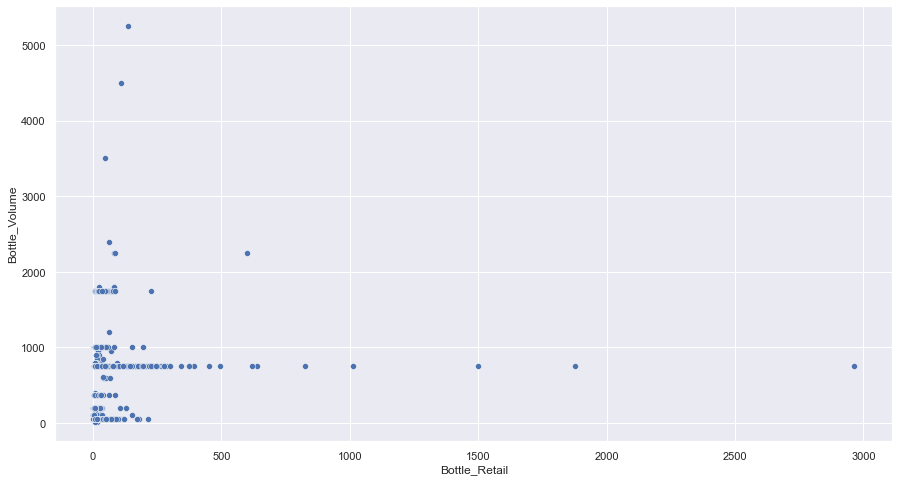

In [26]:
# products.plot.scatter(x='Bottle_Volume', y='Bottle_Retail')
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottle_Volume')
# gfg.set_ylim(0, 80)
# gph.set_xlim(0.98,3000)
# gph.set_xticks(range(0.98,3000))
plt.show()

In [27]:
products.Bottle_Retail.corr((products.Bottle_Volume))

0.012858551897243728

In [28]:
products.Bottle_Retail.corr((products.Bottles_Sold))

-0.04408941079679311

In [29]:
products.Bottles_Sold.corr((products.Bottle_Volume))

-0.000152168220141047

In [30]:
products.Bottles_Sold.corr((products.Num_Stores_Selling))

0.45378226327407434

In [101]:
# filt = products.Bottle_Retail > 1400
xfilt = products.Bottle_Retail > 500
products[xfilt]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue,Category,Category_Name,New_Category_Name
1338,4113,Hennessy Paradis,750,824.990,27,15,22274.73,1052100,Imported Brandies,Brandies
1636,48725,Remy Martin Louis XIII,750,2963.694,17,12,50977.11,1052100,Imported Brandies,Brandies
1919,6051,Glenmorangie Grand Vintage 1997 Limited Edition,750,637.410,8,4,5099.28,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages
2914,901559,HA Blood Oath Trilogy II 3 Pack,2250,600.000,35,35,21000.00,1011200,Straight Bourbon Whiskies,Bourbon
3183,905953,Glenmorangie Grand Vintage 1996,750,618.740,2,2,1237.48,1012300,Single Malt Scotch,Scotch
3194,906532,Glengoyne 30 YO,750,1012.500,1,1,1012.50,1012200,Scotch Whiskies,Scotch
3330,917673,HA Double Eagle Very Rare,750,1500.000,2,2,3000.00,1011200,Straight Bourbon Whiskies,Bourbon
3367,919976,HA OFC Bourbon 1995,750,1875.000,10,10,18750.00,1011200,Straight Bourbon Whiskies,Bourbon


In [102]:
xfilt2 = products.Bottle_Volume > 3000
products[xfilt2]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue,Category,Category_Name,New_Category_Name
0,100015,Fireball Cinnamon Whiskey Bag in Box,3500,45.0,1123,129,50535.0,1081600,Whiskey Liqueur,Whiskey Liqueur
139,101515,Fireball Cinnamon Whiskey Keg,5250,138.0,180,141,24895.5,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages
155,101665,Stumpys Spirits Cocktail Collection Gift Set,4500,108.0,115,26,12420.0,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages


In [100]:
np.sum(products.Bottles_Sold)

31013272

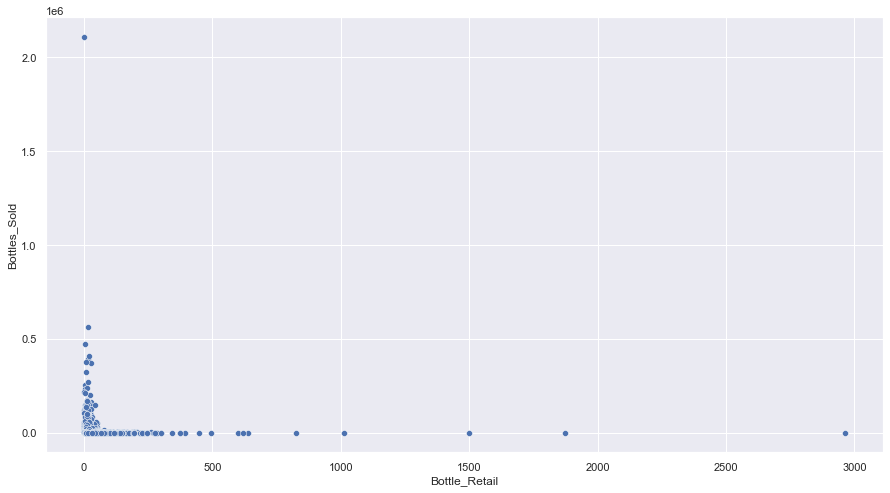

In [34]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottles_Sold')
# gfg.set_ylim(0, 80)

In [103]:
xfilt3= products.Item_Number == '64870'  #outlier of bottles sold
products[xfilt3]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue,Category,Category_Name,New_Category_Name
2035,64870,Fireball Cinnamon Whiskey,100,1.35,2105088,893,2841868.8,1081600,Whiskey Liqueur,Whiskey Liqueur


### create outlier DataFrame to export

In [110]:
df1 = products[xfilt]
df2 = products[xfilt2]
df3 = products[xfilt3]

outliers_df = pd.concat([df1,df2,df3])

outliers_df.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\kmeans_outliers.csv')

remove outliers

In [35]:
# filt = products2.Bottle_Retail > 1400 #drop outliers of Bottle Retail
filt = products2.Bottle_Retail > 500 #drop outliers of Bottle Retail


In [36]:
products2[filt]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue,Category,Category_Name,New_Category_Name
1338,4113,Hennessy Paradis,750,824.990,27,15,22274.73,1052100,Imported Brandies,Brandies
1636,48725,Remy Martin Louis XIII,750,2963.694,17,12,50977.11,1052100,Imported Brandies,Brandies
1919,6051,Glenmorangie Grand Vintage 1997 Limited Edition,750,637.410,8,4,5099.28,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages
2914,901559,HA Blood Oath Trilogy II 3 Pack,2250,600.000,35,35,21000.00,1011200,Straight Bourbon Whiskies,Bourbon
3183,905953,Glenmorangie Grand Vintage 1996,750,618.740,2,2,1237.48,1012300,Single Malt Scotch,Scotch
3194,906532,Glengoyne 30 YO,750,1012.500,1,1,1012.50,1012200,Scotch Whiskies,Scotch
3330,917673,HA Double Eagle Very Rare,750,1500.000,2,2,3000.00,1011200,Straight Bourbon Whiskies,Bourbon
3367,919976,HA OFC Bourbon 1995,750,1875.000,10,10,18750.00,1011200,Straight Bourbon Whiskies,Bourbon


In [37]:

products2 = products2[~filt]

In [38]:
products2.shape

(4308, 10)

In [39]:
filt2 = products2.Bottle_Volume > 3000 #drop outliers of Bottle Volume

In [40]:
products2 = products2[~filt2] 

In [41]:
products2.shape

(4305, 10)

In [42]:
filt3= products2.Item_Number == '64870'  #outlier of bottles sold

In [43]:
products2[filt3]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue,Category,Category_Name,New_Category_Name
2035,64870,Fireball Cinnamon Whiskey,100,1.35,2105088,893,2841868.8,1081600,Whiskey Liqueur,Whiskey Liqueur


In [44]:
# products2[filt3]


products2 = products2[~filt3]

## write out products2

In [45]:
products2.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\products2_outliers_removed.csv')

## scale data for clustering

In [46]:
products2.shape

(4304, 10)

In [47]:
# cols_to_scale = ['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']

In [48]:
scaler = StandardScaler()

In [49]:


products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]] = scaler.fit_transform\
                                           (products2[['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']])
                                                   

products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled']].describe()

,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled
count,4.304000e+03,4.304000e+03,4.304000e+03
mean,2.005779e-15,2.815766e-16,-6.461297e-16
std,1.000116e+00,1.000116e+00,1.000116e+00
min,-2.098764e+00,-8.563283e-01,-2.663149e-01
25%,-1.767973e-01,-5.338854e-01,-2.641354e-01
50%,-1.767973e-01,-2.611585e-01,-2.431472e-01
75%,-1.767973e-01,1.715524e-01,-1.158258e-01
max,4.167375e+00,1.448432e+01,2.246784e+01


In [50]:
# model = KMeans(n_clusters=3, random_state=42)

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


determine optimal number of clusters

In [51]:
from sklearn.metrics import silhouette_score

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]

df_scaled = products2[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.6251630371160916
number of clusters =  3   silhouette score =  0.6131281006442015
number of clusters =  4   silhouette score =  0.6482245985759305
number of clusters =  5   silhouette score =  0.5748147636855242
number of clusters =  6   silhouette score =  0.5889347216218284
number of clusters =  7   silhouette score =  0.5521953094242108
number of clusters =  8   silhouette score =  0.4840831438521766
number of clusters =  9   silhouette score =  0.527441216925
number of clusters =  10   silhouette score =  0.49151813314556186


In [52]:
inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

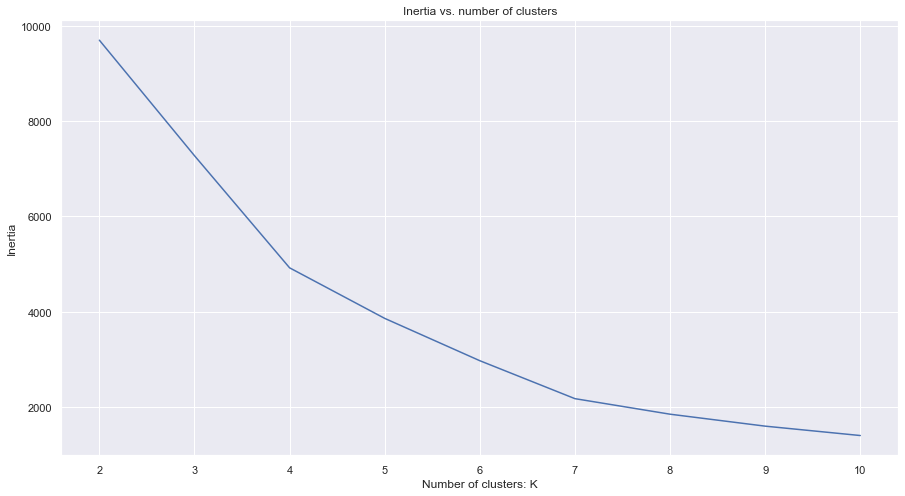

In [53]:

plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()

In [54]:
# stop

get four clusters

In [55]:


cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


model = KMeans(n_clusters=4, random_state=42)

model.fit(products2[cluster_cols])

products2['product_cluster'] = model.predict(products2[cluster_cols])

In [56]:
products2.head()

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue,Category,Category_Name,New_Category_Name,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,product_cluster
1,10006,Scoresby Rare Scotch,750,7.70,4619,197,35566.30,1012200,Scotch Whiskies,Scotch,-0.176797,-0.648276,-0.079924,1
2,100077,Kraken Rum w/ Tiki Glass,750,15.68,2679,136,42006.72,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages,-0.176797,-0.400847,-0.158226,1
3,10008,Scoresby Rare Scotch,1750,15.75,12340,287,194355.00,1012200,Scotch Whiskies,Scotch,2.456034,-0.398676,0.231710,0
4,10009,Scoresby Rare Scotch,1000,10.11,1722,70,17409.42,1012200,Scotch Whiskies,Scotch,0.481411,-0.573551,-0.196852,1
5,100148,Jack Daniels Single Barrel w/Snifter Glass,750,41.39,606,120,25082.34,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages,-0.176797,0.396324,-0.241896,1


In [57]:
products2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4304 entries, 1 to 4474
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Number           4304 non-null   object 
 1   Item_Description      4304 non-null   object 
 2   Bottle_Volume         4304 non-null   int64  
 3   Bottle_Retail         4304 non-null   float64
 4   Bottles_Sold          4304 non-null   int32  
 5   Num_Stores_Selling    4304 non-null   int32  
 6   revenue               4304 non-null   float64
 7   Category              4304 non-null   object 
 8   Category_Name         4304 non-null   object 
 9   New_Category_Name     4304 non-null   object 
 10  Bottle_Volume_scaled  4304 non-null   float64
 11  Bottle_Retail_scaled  4304 non-null   float64
 12  Bottles_Sold_scaled   4304 non-null   float64
 13  product_cluster       4304 non-null   int32  
dtypes: float64(5), int32(3), int64(1), object(5)
memory usage: 453.9+ KB


In [58]:
products2['Bottle_Volume_liters'] = products2.Bottle_Volume / 1000

# Name Clusters

In [59]:
prod_dict = {0:'Volume_For_Dollar', 1:'Everything_Else', 2:'Popular_Bottles',3:'High_End'}


In [60]:
products2[['product_cluster']].apply(lambda p: prod_dict[p[0]],axis=1)

1         Everything_Else
2         Everything_Else
3       Volume_For_Dollar
4         Everything_Else
5         Everything_Else
              ...        
4470      Everything_Else
4471      Everything_Else
4472      Everything_Else
4473      Everything_Else
4474      Everything_Else
Length: 4304, dtype: object

Name Product Clusters

In [61]:
products2['cluster_name'] = products2['product_cluster'].apply(lambda p: prod_dict[p])

In [62]:
products2.cluster_name

1         Everything_Else
2         Everything_Else
3       Volume_For_Dollar
4         Everything_Else
5         Everything_Else
              ...        
4470      Everything_Else
4471      Everything_Else
4472      Everything_Else
4473      Everything_Else
4474      Everything_Else
Name: cluster_name, Length: 4304, dtype: object

In [63]:
products2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4304 entries, 1 to 4474
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Number           4304 non-null   object 
 1   Item_Description      4304 non-null   object 
 2   Bottle_Volume         4304 non-null   int64  
 3   Bottle_Retail         4304 non-null   float64
 4   Bottles_Sold          4304 non-null   int32  
 5   Num_Stores_Selling    4304 non-null   int32  
 6   revenue               4304 non-null   float64
 7   Category              4304 non-null   object 
 8   Category_Name         4304 non-null   object 
 9   New_Category_Name     4304 non-null   object 
 10  Bottle_Volume_scaled  4304 non-null   float64
 11  Bottle_Retail_scaled  4304 non-null   float64
 12  Bottles_Sold_scaled   4304 non-null   float64
 13  product_cluster       4304 non-null   int32  
 14  Bottle_Volume_liters  4304 non-null   float64
 15  cluster_name         

In [64]:
products2.groupby(['product_cluster']).agg({'Item_Number':'nunique','revenue':'sum','Bottle_Volume' : 'mean', 'Bottle_Retail':'mean','Bottles_Sold':'mean' })

,Item_Number,revenue,Bottle_Volume,Bottle_Retail,Bottles_Sold
product_cluster,,,,,
0,454,7.453503e+07,1754.295154,22.997218,8943.638767
1,3648,2.224228e+08,704.661189,24.183738,4395.868803
2,42,1.108696e+08,760.714286,13.693436,196842.380952
3,157,3.351090e+06,738.216561,151.706257,164.312102


In [65]:
# stop

In [66]:
products2.groupby(['product_cluster']).agg({'Item_Number':'nunique','revenue':'sum','Bottle_Volume' :['min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'] })

Item_Number       revenue Bottle_Volume                    \
                    nunique           sum           min   max         std   
product_cluster                                                             
0                       454  7.453503e+07          1750  2400   45.288490   
1                      3648  2.224228e+08            20  1200  210.779220   
2                        42  1.108696e+08            50  1750  461.774905   
3                       157  3.351090e+06           100  1750  139.612574   

                                     Bottle_Retail                         \
                 median         mean           min         max        std   
product_cluster                                                             
0                1750.0  1754.295154          7.34   87.247228  15.345373   
1                 750.0   704.661189          0.99   86.670000  17.033888   
2                 750.0   760.714286          1.34   41.522231   9.550859   
3                 750.0   738.216561         88.83  495.750000  73.084335   

                                        Bottles_Sold                         \
                     median        mean          min     max            std   
product_cluster                                                               
0                 17.250000   22.997218            3  108712   17253.510529   
1                 19.760000   24.183738            1   97514   11185.981101   
2                 11.413451   13.693436       101445  563260  110826.287590   
3                129.240000  151.706257            1    5273     510.275803   

                                          
                   median           mean  
product_cluster                           
0                  2039.5    8943.638767  
1                   521.0    4395.868803  
2                145871.5  196842.380952  
3                    24.0     164.312102

In [67]:
products2.groupby(['product_cluster']).agg({'Bottle_Volume_liters' :['min','max', 'mean'], 'Bottle_Retail':['min','max', 'mean'],'Bottles_Sold':['min','max', 'mean'] })

Bottle_Volume_liters                 Bottle_Retail  \
                                 min   max      mean           min   
product_cluster                                                      
0                               1.75  2.40  1.754295          7.34   
1                               0.02  1.20  0.704661          0.99   
2                               0.05  1.75  0.760714          1.34   
3                               0.10  1.75  0.738217         88.83   

                                        Bottles_Sold                         
                        max        mean          min     max           mean  
product_cluster                                                              
0                 87.247228   22.997218            3  108712    8943.638767  
1                 86.670000   24.183738            1   97514    4395.868803  
2                 41.522231   13.693436       101445  563260  196842.380952  
3                495.750000  151.706257            1    5273     164.312102

In [68]:
products2['price_per_ml'] = products2['Bottle_Retail'] / products2['Bottle_Volume']

In [69]:
products2.groupby(['product_cluster']).agg({'Item_Number':'nunique','Bottle_Volume':'nunique','revenue':'sum','price_per_ml':['min','max','std', 'median', 'mean']})

Item_Number Bottle_Volume       revenue price_per_ml  \
                    nunique       nunique           sum          min   
product_cluster                                                        
0                       454             4  7.453503e+07     0.004194   
1                      3648            17  2.224228e+08     0.003200   
2                        42             7  1.108696e+08     0.005960   
3                       157             6  3.351090e+06     0.117188   

                                                         
                      max       std    median      mean  
product_cluster                                          
0                0.049856  0.008510  0.009857  0.013058  
1                0.712500  0.035700  0.030000  0.039665  
2                0.129000  0.020698  0.017795  0.021801  
3                1.500000  0.159681  0.173320  0.223203

In [70]:
products2.groupby(['product_cluster']).agg({'Item_Number':'nunique','revenue':'sum','Bottle_Volume' :['min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'] })

Item_Number       revenue Bottle_Volume                    \
                    nunique           sum           min   max         std   
product_cluster                                                             
0                       454  7.453503e+07          1750  2400   45.288490   
1                      3648  2.224228e+08            20  1200  210.779220   
2                        42  1.108696e+08            50  1750  461.774905   
3                       157  3.351090e+06           100  1750  139.612574   

                                     Bottle_Retail                         \
                 median         mean           min         max        std   
product_cluster                                                             
0                1750.0  1754.295154          7.34   87.247228  15.345373   
1                 750.0   704.661189          0.99   86.670000  17.033888   
2                 750.0   760.714286          1.34   41.522231   9.550859   
3                 750.0   738.216561         88.83  495.750000  73.084335   

                                        Bottles_Sold                         \
                     median        mean          min     max            std   
product_cluster                                                               
0                 17.250000   22.997218            3  108712   17253.510529   
1                 19.760000   24.183738            1   97514   11185.981101   
2                 11.413451   13.693436       101445  563260  110826.287590   
3                129.240000  151.706257            1    5273     510.275803   

                                          
                   median           mean  
product_cluster                           
0                  2039.5    8943.638767  
1                   521.0    4395.868803  
2                145871.5  196842.380952  
3                    24.0     164.312102

In [71]:
# stop


In [72]:
products2.groupby(['cluster_name']).agg({'Item_Number':'nunique','revenue':'sum','Bottle_Volume' :['min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'] })

Item_Number       revenue Bottle_Volume                    \
                      nunique           sum           min   max         std   
cluster_name                                                                  
Everything_Else          3648  2.224228e+08            20  1200  210.779220   
High_End                  157  3.351090e+06           100  1750  139.612574   
Popular_Bottles            42  1.108696e+08            50  1750  461.774905   
Volume_For_Dollar         454  7.453503e+07          1750  2400   45.288490   

                                       Bottle_Retail                         \
                   median         mean           min         max        std   
cluster_name                                                                  
Everything_Else     750.0   704.661189          0.99   86.670000  17.033888   
High_End            750.0   738.216561         88.83  495.750000  73.084335   
Popular_Bottles     750.0   760.714286          1.34   41.522231   9.550859   
Volume_For_Dollar  1750.0  1754.295154          7.34   87.247228  15.345373   

                                          Bottles_Sold                         \
                       median        mean          min     max            std   
cluster_name                                                                    
Everything_Else     19.760000   24.183738            1   97514   11185.981101   
High_End           129.240000  151.706257            1    5273     510.275803   
Popular_Bottles     11.413451   13.693436       101445  563260  110826.287590   
Volume_For_Dollar   17.250000   22.997218            3  108712   17253.510529   

                                            
                     median           mean  
cluster_name                                
Everything_Else       521.0    4395.868803  
High_End               24.0     164.312102  
Popular_Bottles    145871.5  196842.380952  
Volume_For_Dollar    2039.5    8943.638767

In [93]:
# proc_freq(products2.loc[products2.cluster_name == 'Everything_Else'],'New_Category_Name')
    

In [91]:
products2.loc[products2.cluster_name == 'Everything_Else']['New_Category_Name'].value_counts()/3648*100

Whiskies                                14.089912
Vodkas                                  13.952851
Bourbon                                  9.237939
Liquers                                  9.128289
Rum                                      7.593202
Temporary & Specialty Packages           7.373904
Tequila                                  7.236842
Special Order Items                      5.783991
Scotch                                   4.961623
Brandies                                 4.331140
Gin                                      4.002193
Schnapps                                 3.262061
Cocktails                                2.138158
Imported Distilled Spirits Specialty     1.781798
American Distilled Spirits Specialty     1.617325
Mezcal                                   1.206140
Whiskey Liqueur                          1.069079
Neutral Grain Spirits Flavored           0.712719
Neutral Grain Spirits                    0.301535
Triple Sec                               0.274123


In [94]:
# proc_freq(products2.loc[products2.cluster_name == 'High_End'],'New_Category_Name')
products2.loc[products2.cluster_name == 'High_End']['New_Category_Name'].value_counts()/157*100

Scotch                                  21.019108
Tequila                                 15.286624
Whiskies                                15.286624
Temporary & Specialty Packages          10.828025
Bourbon                                  8.280255
Special Order Items                      7.006369
Imported Distilled Spirits Specialty     5.095541
Mezcal                                   3.821656
Rum                                      3.184713
Cocktails                                2.547771
Brandies                                 1.910828
Liquers                                  1.273885
Whiskey Liqueur                          1.273885
Vodkas                                   1.273885
Gin                                      0.636943
Neutral Grain Spirits                    0.636943
American Distilled Spirits Specialty     0.636943
Name: New_Category_Name, dtype: float64

In [95]:
# proc_freq(products2.loc[products2.cluster_name == 'Popular_Bottles'],'New_Category_Name')
products2.loc[products2.cluster_name == 'Popular_Bottles']['New_Category_Name'].value_counts()/42*100

Vodkas                                  30.952381
Whiskies                                28.571429
Rum                                     14.285714
Whiskey Liqueur                         14.285714
Brandies                                 4.761905
Imported Distilled Spirits Specialty     2.380952
Schnapps                                 2.380952
Tequila                                  2.380952
Name: New_Category_Name, dtype: float64

In [96]:
# proc_freq(products2.loc[products2.cluster_name == 'Volume_For_Dollar'],'New_Category_Name')
products2.loc[products2.cluster_name == 'Volume_For_Dollar']['New_Category_Name'].value_counts()/454

Cocktails                         0.200441
Vodkas                            0.171806
Rum                               0.118943
Whiskies                          0.112335
Bourbon                           0.063877
Temporary & Specialty Packages    0.055066
Gin                               0.055066
Scotch                            0.046256
Special Order Items               0.044053
Tequila                           0.037445
Liquers                           0.035242
Brandies                          0.028634
Schnapps                          0.019824
Whiskey Liqueur                   0.008811
Neutral Grain Spirits             0.002203
Name: New_Category_Name, dtype: float64

In [77]:
proc_freq(products2,'cluster_name')

,cluster_name,Frequency,Percent,Cumulative_Frequency,Cumulative_Percent
0,Everything_Else,3651,84.83,3651,84.83
1,High_End,157,3.65,3808,88.48
2,Popular_Bottles,42,0.98,3850,89.45
3,Volume_For_Dollar,454,10.55,4304,100.00


In [78]:
products2.groupby(['cluster_name']).agg({'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

price_per_ml                                          \
                           min       max       std    median      mean   
cluster_name                                                             
Everything_Else       0.003200  0.712500  0.035700  0.030000  0.039665   
High_End              0.117188  1.500000  0.159681  0.173320  0.223203   
Popular_Bottles       0.005960  0.129000  0.020698  0.017795  0.021801   
Volume_For_Dollar     0.004194  0.049856  0.008510  0.009857  0.013058   

                  Bottles_Sold                                   \
                           min     max            std    median   
cluster_name                                                      
Everything_Else              1   97514   11185.981101     521.0   
High_End                     1    5273     510.275803      24.0   
Popular_Bottles         101445  563260  110826.287590  145871.5   
Volume_For_Dollar            3  108712   17253.510529    2039.5   

                                 Num_Stores_Selling                            \
                            mean                min   max         std  median   
cluster_name                                                                    
Everything_Else      4395.868803                  1  1551  178.997912    46.0   
High_End              164.312102                  1   279   51.397681     6.0   
Popular_Bottles    196842.380952                 73  1725  486.579562  1285.5   
Volume_For_Dollar    8943.638767                  1  1199  192.462092    79.0   

                                
                          mean  
cluster_name                    
Everything_Else     111.299644  
High_End             34.630573  
Popular_Bottles    1124.476190  
Volume_For_Dollar   152.900881

In [79]:
products2.groupby(['cluster_name']).agg({'revenue':['sum'],'Bottle_Volume':['nunique','min','max','median'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

revenue Bottle_Volume                      \
                            sum       nunique   min   max  median   
cluster_name                                                        
Everything_Else    2.224228e+08            17    20  1200   750.0   
High_End           3.351090e+06             6   100  1750   750.0   
Popular_Bottles    1.108696e+08             7    50  1750   750.0   
Volume_For_Dollar  7.453503e+07             4  1750  2400  1750.0   

                  price_per_ml                                          \
                           min       max       std    median      mean   
cluster_name                                                             
Everything_Else       0.003200  0.712500  0.035700  0.030000  0.039665   
High_End              0.117188  1.500000  0.159681  0.173320  0.223203   
Popular_Bottles       0.005960  0.129000  0.020698  0.017795  0.021801   
Volume_For_Dollar     0.004194  0.049856  0.008510  0.009857  0.013058   

                  Bottles_Sold                                   \
                           min     max            std    median   
cluster_name                                                      
Everything_Else              1   97514   11185.981101     521.0   
High_End                     1    5273     510.275803      24.0   
Popular_Bottles         101445  563260  110826.287590  145871.5   
Volume_For_Dollar            3  108712   17253.510529    2039.5   

                                 Num_Stores_Selling                            \
                            mean                min   max         std  median   
cluster_name                                                                    
Everything_Else      4395.868803                  1  1551  178.997912    46.0   
High_End              164.312102                  1   279   51.397681     6.0   
Popular_Bottles    196842.380952                 73  1725  486.579562  1285.5   
Volume_For_Dollar    8943.638767                  1  1199  192.462092    79.0   

                                
                          mean  
cluster_name                    
Everything_Else     111.299644  
High_End             34.630573  
Popular_Bottles    1124.476190  
Volume_For_Dollar   152.900881

In [80]:
products2.groupby(['cluster_name']).agg({'revenue':['sum'],'Bottle_Volume':['nunique','min','max','median'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

revenue Bottle_Volume                      \
                            sum       nunique   min   max  median   
cluster_name                                                        
Everything_Else    2.224228e+08            17    20  1200   750.0   
High_End           3.351090e+06             6   100  1750   750.0   
Popular_Bottles    1.108696e+08             7    50  1750   750.0   
Volume_For_Dollar  7.453503e+07             4  1750  2400  1750.0   

                  price_per_ml                                          \
                           min       max       std    median      mean   
cluster_name                                                             
Everything_Else       0.003200  0.712500  0.035700  0.030000  0.039665   
High_End              0.117188  1.500000  0.159681  0.173320  0.223203   
Popular_Bottles       0.005960  0.129000  0.020698  0.017795  0.021801   
Volume_For_Dollar     0.004194  0.049856  0.008510  0.009857  0.013058   

                  Bottles_Sold                                   \
                           min     max            std    median   
cluster_name                                                      
Everything_Else              1   97514   11185.981101     521.0   
High_End                     1    5273     510.275803      24.0   
Popular_Bottles         101445  563260  110826.287590  145871.5   
Volume_For_Dollar            3  108712   17253.510529    2039.5   

                                 Num_Stores_Selling                            \
                            mean                min   max         std  median   
cluster_name                                                                    
Everything_Else      4395.868803                  1  1551  178.997912    46.0   
High_End              164.312102                  1   279   51.397681     6.0   
Popular_Bottles    196842.380952                 73  1725  486.579562  1285.5   
Volume_For_Dollar    8943.638767                  1  1199  192.462092    79.0   

                                
                          mean  
cluster_name                    
Everything_Else     111.299644  
High_End             34.630573  
Popular_Bottles    1124.476190  
Volume_For_Dollar   152.900881

In [81]:
pd.set_option('display.max_columns', None)
products2.groupby(['cluster_name']).agg({'Item_Number':['nunique'],'revenue':['sum'],'Bottle_Volume':['count','nunique','min','max','median','std'],'Bottle_Retail':['min','max','std', 'median', 'mean'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

Item_Number       revenue Bottle_Volume                      \
                      nunique           sum         count nunique   min   max   
cluster_name                                                                    
Everything_Else          3648  2.224228e+08          3651      17    20  1200   
High_End                  157  3.351090e+06           157       6   100  1750   
Popular_Bottles            42  1.108696e+08            42       7    50  1750   
Volume_For_Dollar         454  7.453503e+07           454       4  1750  2400   

                                      Bottle_Retail                         \
                   median         std           min         max        std   
cluster_name                                                                 
Everything_Else     750.0  210.779220          0.99   86.670000  17.033888   
High_End            750.0  139.612574         88.83  495.750000  73.084335   
Popular_Bottles     750.0  461.774905          1.34   41.522231   9.550859   
Volume_For_Dollar  1750.0   45.288490          7.34   87.247228  15.345373   

                                          price_per_ml                      \
                       median        mean          min       max       std   
cluster_name                                                                 
Everything_Else     19.760000   24.183738     0.003200  0.712500  0.035700   
High_End           129.240000  151.706257     0.117188  1.500000  0.159681   
Popular_Bottles     11.413451   13.693436     0.005960  0.129000  0.020698   
Volume_For_Dollar   17.250000   22.997218     0.004194  0.049856  0.008510   

                                      Bottles_Sold                         \
                     median      mean          min     max            std   
cluster_name                                                                
Everything_Else    0.030000  0.039665            1   97514   11185.981101   
High_End           0.173320  0.223203            1    5273     510.275803   
Popular_Bottles    0.017795  0.021801       101445  563260  110826.287590   
Volume_For_Dollar  0.009857  0.013058            3  108712   17253.510529   

                                           Num_Stores_Selling        \
                     median           mean                min   max   
cluster_name                                                          
Everything_Else       521.0    4395.868803                  1  1551   
High_End               24.0     164.312102                  1   279   
Popular_Bottles    145871.5  196842.380952                 73  1725   
Volume_For_Dollar    2039.5    8943.638767                  1  1199   

                                                    
                          std  median         mean  
cluster_name                                        
Everything_Else    178.997912    46.0   111.299644  
High_End            51.397681     6.0    34.630573  
Popular_Bottles    486.579562  1285.5  1124.476190  
Volume_For_Dollar  192.462092    79.0   152.900881

In [82]:
products2.cluster_name.value_counts()

Everything_Else      3651
Volume_For_Dollar     454
High_End              157
Popular_Bottles        42
Name: cluster_name, dtype: int64

In [83]:
# df.sort_values(by=['Population'], ascending=False)
products2.sort_values(by=['revenue'], ascending=False)
products2[['cluster_name','revenue','Item_Description','Bottle_Retail','Bottle_Volume']].sort_values(by=['revenue'], ascending=False)
# products2.style.format("{:.0f}")


,cluster_name,revenue,Item_Description,Bottle_Retail,Bottle_Volume
1205,Popular_Bottles,10622805.00,Titos Handmade Vodka,28.500000,1750
214,Popular_Bottles,8831916.80,Black Velvet,15.680000,1750
1204,Popular_Bottles,7720284.17,Titos Handmade Vodka,19.010000,1000
2772,Popular_Bottles,6001266.00,Patron Silver,41.522231,750
1203,Popular_Bottles,5890845.00,Titos Handmade Vodka,15.000000,750
...,...,...,...,...,...
1249,Everything_Else,31.50,Devil''s Spring Vodka,6.300000,375
1120,Everything_Else,30.00,Y-not Vodka,15.000000,750
2235,Everything_Else,16.26,Bols Melon,8.130000,750
4245,Everything_Else,11.76,SOOH Margaritaville Silver Tequila,11.760000,1000


In [84]:
products2.loc[products2.product_cluster==3,:]['Bottle_Retail'].max()

495.75

In [85]:
# products2.loc[products2.product_cluster==1,:]

In [86]:
products_out=products2[['Item_Number','Item_Description','Bottle_Volume','Bottle_Retail', 'Bottles_Sold','cluster_name','revenue','Num_Stores_Selling','New_Category_Name']]

In [87]:
products['revenue'].sum()

424233229.6

In [88]:
check

424233229.6

In [89]:
# products_out.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\product_clusters.csv')